# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [315]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import date
from pprint import pprint
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy 


#Output File (csv)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [316]:
api_key = '485897fad5ba21d49e71607d37fca98b' # https://knasmueller.net/using-the-open-weather-map-api-with-python
#url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + api_key
#weather_api_key = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q={city_name}'


In [317]:
#cities = pd.read_csv("https://raw.githubusercontent.com/wingchen/citipy/master/citipy/worldcities.csv")
#cities.head()


## Generate Cities List

In [318]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []


#Create a set of random Lat and Lng combinations 

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#saved_lats = []
#saved_lngs = []

#Identify the nearest city for each Lat, Lng combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   # country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
   # city = city.replace(" ", "%20")
    #If the city is unique, add it to cities list 
    if city not in cities:
        cities.append(city)
    #    countries.append(country.upper())
        #saved_lats.append(lat_lng[0])
# Print the city count to confirm sufficient amt. 
print(len(cities))
#print(cities)
#Print country count to confirm it corresponds to city count

#print(len(countries))

583


# Create dataframe to store data

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [319]:
api_key = '485897fad5ba21d49e71607d37fca98b' # https://knasmueller.net/using-the-open-weather-map-api-with-python
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [320]:
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=485897fad5ba21d49e71607d37fca98b


In [321]:

#message for user
print("Here comes the data.......")

city_info = []

count = 0 

for locations in cities:
    count +=1
    city_url = query_url + "&q=" + locations 
    print("Processing record set", count, "of", len(cities), "with the city named", locations,)
    
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #write to list 
        city_info.append({"City":locations, "Latitude": city_lat, "Longitude": city_lng, 
                          "Max Temperature": city_max_temp, "Humidity": city_humidity, 
                         "Clouds": city_clouds, "Wind": city_wind, "Country": city_country,
                         "Date": city_date})
    except:
        print("Error, city not found")
        pass

print("Your data has been retrieved")

Here comes the data.......
Processing record set 1 of 583 with the city named punta arenas
Processing record set 2 of 583 with the city named port hedland
Processing record set 3 of 583 with the city named hilo
Processing record set 4 of 583 with the city named nome
Processing record set 5 of 583 with the city named busselton
Processing record set 6 of 583 with the city named mataura
Processing record set 7 of 583 with the city named college
Processing record set 8 of 583 with the city named georgetown
Processing record set 9 of 583 with the city named cape town
Processing record set 10 of 583 with the city named lagoa
Processing record set 11 of 583 with the city named bilibino
Processing record set 12 of 583 with the city named pisco
Processing record set 13 of 583 with the city named buchanan
Processing record set 14 of 583 with the city named amderma
Error, city not found
Processing record set 15 of 583 with the city named kodiak
Processing record set 16 of 583 with the city named 

Processing record set 130 of 583 with the city named provideniya
Processing record set 131 of 583 with the city named ust-ilimsk
Processing record set 132 of 583 with the city named kavaratti
Processing record set 133 of 583 with the city named murygino
Processing record set 134 of 583 with the city named kaniama
Processing record set 135 of 583 with the city named kathu
Processing record set 136 of 583 with the city named buin
Processing record set 137 of 583 with the city named monterey
Processing record set 138 of 583 with the city named cadillac
Processing record set 139 of 583 with the city named pafos
Processing record set 140 of 583 with the city named albany
Processing record set 141 of 583 with the city named gladstone
Processing record set 142 of 583 with the city named limoeiro do ajuru
Processing record set 143 of 583 with the city named bilma
Processing record set 144 of 583 with the city named narsaq
Processing record set 145 of 583 with the city named dakar
Processing re

Processing record set 258 of 583 with the city named kingisepp
Processing record set 259 of 583 with the city named uspenka
Processing record set 260 of 583 with the city named yamada
Processing record set 261 of 583 with the city named fortuna
Processing record set 262 of 583 with the city named yanam
Processing record set 263 of 583 with the city named vagur
Processing record set 264 of 583 with the city named prince rupert
Processing record set 265 of 583 with the city named komsomolets
Processing record set 266 of 583 with the city named faya
Processing record set 267 of 583 with the city named necochea
Processing record set 268 of 583 with the city named caravelas
Processing record set 269 of 583 with the city named oranjemund
Processing record set 270 of 583 with the city named nuevo progreso
Processing record set 271 of 583 with the city named guerrero negro
Processing record set 272 of 583 with the city named karauzyak
Error, city not found
Processing record set 273 of 583 with

Processing record set 386 of 583 with the city named sorland
Processing record set 387 of 583 with the city named ahipara
Processing record set 388 of 583 with the city named aksu
Processing record set 389 of 583 with the city named lundin links
Processing record set 390 of 583 with the city named opunake
Processing record set 391 of 583 with the city named pyinmana
Processing record set 392 of 583 with the city named aklavik
Processing record set 393 of 583 with the city named khani
Processing record set 394 of 583 with the city named port-cartier
Processing record set 395 of 583 with the city named skibbereen
Processing record set 396 of 583 with the city named seybaplaya
Processing record set 397 of 583 with the city named williamsburg
Processing record set 398 of 583 with the city named sao joao da barra
Processing record set 399 of 583 with the city named ardatov
Processing record set 400 of 583 with the city named katsuura
Processing record set 401 of 583 with the city named bata

Processing record set 516 of 583 with the city named marquette
Processing record set 517 of 583 with the city named hongjiang
Processing record set 518 of 583 with the city named lodja
Processing record set 519 of 583 with the city named parintins
Processing record set 520 of 583 with the city named isangel
Processing record set 521 of 583 with the city named padilla
Processing record set 522 of 583 with the city named cockburn harbour
Error, city not found
Processing record set 523 of 583 with the city named naerbo
Processing record set 524 of 583 with the city named chiredzi
Processing record set 525 of 583 with the city named villa carlos paz
Processing record set 526 of 583 with the city named hamilton
Processing record set 527 of 583 with the city named xudat
Processing record set 528 of 583 with the city named strezhevoy
Processing record set 529 of 583 with the city named porvoo
Processing record set 530 of 583 with the city named kalanguy
Processing record set 531 of 583 with t

In [322]:
#base_url = "http://api.openweathermap.org/data/2.5/weather?"
#api_key = '485897fad5ba21d49e71607d37fca98b'
#define units
#units = "imperial"

# Build partial query URL
#query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
# Build partial query URL
#query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#settings = {"units": "imperial", "appid": api_key}

#Initiate counter for city number below
#number = 1

#Lists for holding required items
#city_name = []
#lats = []
#lngs = []
#temps = []
#humid = []
#clouds = []
#wind = []
#dates = []
#countries = []

#count_one = 0
#set_one = 1

       

 #Loop through each city, extract required items, and print result


#for idx, city in city_weather_df.iterrows() :
#x = 0

#print('------------------------------')
#print('Start of Records')
#print('------------------------------')

#for city in cities:
    
   # reponse = requests.get(query_url + city).json()
 #   try:
  #      response = requests.get(query_url+city.replace(" ","&")).json()
        
   #     lat.append(reponse['coord']['lat'])
    #    lng.append(response['coord']['lon'])
     #   temp.append(response['main']['temp'])
      #  humid.append(reponse['main']['humidity'])
#        clouds.append(response['clouds']['all'])
 #       wind.append(response['wind']['speed'])
       # print(f'City number {number} of {len(cities)} complete. | Added {city}')
  #      if count_one > 48: 
   #         count_one = 1
    #        set_one += 1
     #       city_name.append(city)
      #  else:
 #           count_one += 1
#            city_name.append(city)
  #      print(f"Processing Record {count_one} of Set {set_one} | {city}")
   # except Exception:
    #    print("City not found. Skipping...")
#print("------------------------------\nData Retrieval Complete\n------------------------------")
  #  except KeyError:
   #     print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
    #    number = number + 1
        
#print('------------------------------')
#print('End of Records')
#print('------------------------------')
    
    
    
    
    
    
    #print(f"Processing Record {x} of {len(cities_df)} | {city}")
        #x = x + 1
  #  append values to lists
     #   lats.append(response["coord"]["lat"])
      #  lngs.append(response["coord"]["lon"])
       # temps.append(response["main"]["temp_max"])
   #     humid.append(response["main"]["humidity"])
    #    clouds.append(response["clouds"]["all"])
     #   wind.append(response["wind"]["speed"])
      #  countries.append(response["sys"]["country"])
  #      dates.append(response["dt"])
   #     cities.append(city)
    #    countries.append(cities_df.loc[cities_df["City"]==city,"Country"].iloc[0])
    #except:
     #   print(f"City not found. Skipping...")
            
     
       # city_name.append(city_data['name'])
       # lat.append(city_data['coord']['lat'])
       # lng.append(city_data['coord']['lon'])
       # temp.append(city_data['main']['temp'])
       # humid.append(city_data['main']['humidity'])
       # clouds.append(city_data['clouds']['all'])
       ## wind.append(city_data['wind']['speed'])
        #print(f'City number {number} of {len(cities)} complete. | Added {city}')  
    #number = number + 1
    #c = city['City']
      #  print(idx)
        # Weather API
        #weather_api_key = f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q={c}'
        #city_data = (requests.get(weather_api_key)).json()
       # print(city_data)
       
       
       
      #  onerow = city_weather_df.loc[city_weather_df["City"] == c]
       
       # city_name.append(city_data)
        #lats.append(onerow['Lat'][idx])
        #lngs.append(onerow['Lng'][idx])
        #temps.append(onerow['Max Temp'][idx])
        #humid.append(onerow['Humidity'][idx])
        #clouds.append(onerow['Cloudiness'][idx])
        #wind.append(onerow['Wind Speed'][idx])
        #countries.append(onerow['Country'][idx])
        #dates.append(["dt"])
        #number = number + 1
       
   # except KeyError:
  #  except:
      #  print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
      #  number = number + 1
       
        
#print("done") 

In [325]:
city_info_pd = pd.DataFrame(city_info)

city_info_pd.count()

City               535
Latitude           535
Longitude          535
Max Temperature    535
Humidity           535
Clouds             535
Wind               535
Country            535
Date               535
dtype: int64

In [326]:
city_info_pd.to_csv(output_data_file)
city_info_pd.head()

#cities_df = pd.DataFrame({'City': cities})

#city_weather_df.columns = ["city"]
#cities_df = city_weather_df.drop_duplicates(subset="City", keep='first', inplace=False, ignore_index=True)

#Preview dataframe 
#cities_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind,Country,Date
0,punta arenas,-53.1500,-70.9167,32.11,74,0,7.11,CL,1622656110
1,port hedland,-20.3167,118.5667,69.85,37,94,9.22,AU,1622656134
2,hilo,19.7297,-155.0900,76.80,79,90,4.61,US,1622655872
3,nome,64.5011,-165.4064,41.16,56,90,8.05,US,1622656135
4,busselton,-33.6500,115.3333,60.21,69,96,2.15,AU,1622656135


In [324]:
#Add columns to cities dataframe
#cities_df["Cloudiness"] = ""
#cities_df["Country"] = ""
#cities_df["Date"] = ""
#cities_df["Humidity"] = ""
#cities_df["Latitude"] = ""
#cities_df["Longitude"] = ""
#cities_df["Max Temp"] = ""
#cities_df["Windspeed"] = ""
#cities_df.head()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [328]:
#create dataframe from the lists of results
#city_info_pd = pd.DataFrame(city_info)
#city_info_pd.count()


#save dataframe to csv file
#rawdata_df.to_csv("Cities+Data.csv",index=False)
#rawdata_df.head(10)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [331]:
#  Get the indices of cities that have humidity over 100%.
maxhumid = city_info_pd.index[city_info_pd["Humidity"] > 100].tolist()
maxhumid

[]

In [332]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_info_pd.drop(maxhumid,inplace=False)
clean_city_data.head(10)


,City,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind,Country,Date
0,punta arenas,-53.1500,-70.9167,32.11,74,0,7.11,CL,1622656110
1,port hedland,-20.3167,118.5667,69.85,37,94,9.22,AU,1622656134
2,hilo,19.7297,-155.0900,76.80,79,90,4.61,US,1622655872
3,nome,64.5011,-165.4064,41.16,56,90,8.05,US,1622656135
4,busselton,-33.6500,115.3333,60.21,69,96,2.15,AU,1622656135
5,mataura,-46.1927,168.8643,49.48,97,18,3.22,NZ,1622656135
6,college,64.8569,-147.8028,56.08,74,75,0.00,US,1622656135
7,georgetown,5.4112,100.3354,83.89,87,20,5.01,MY,1622655911
8,cape town,-33.9258,18.4232,62.11,80,20,4.00,ZA,1622656082
9,lagoa,39.0500,-27.9833,59.50,59,86,5.26,PT,1622656136


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

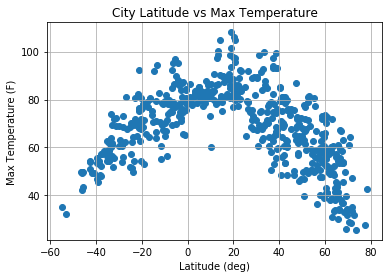

In [334]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Max Temperature"])
plt.title("City Latitude vs Max Temperature")
plt.grid(True)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude (deg)")
plt.savefig("City Latitude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

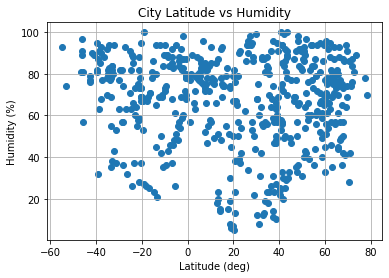

In [335]:

plt.scatter(clean_city_data["Latitude"],clean_city_data["Humidity"])
plt.title("City Latitude vs Humidity")
plt.grid(True)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (deg)")
plt.savefig("City Latitude vs Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

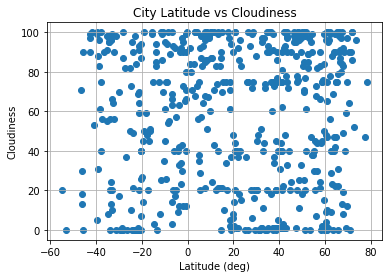

In [338]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Clouds"])
plt.title(f"City Latitude vs Cloudiness")
plt.grid(True)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude (deg)")
plt.savefig("City Latitude vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

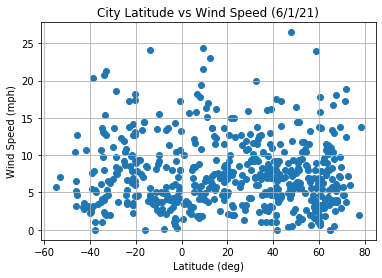

In [340]:
today='6/1/21'
plt.scatter(clean_city_data["Latitude"],clean_city_data["Wind"])
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.grid(True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (deg)")
plt.savefig("City Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

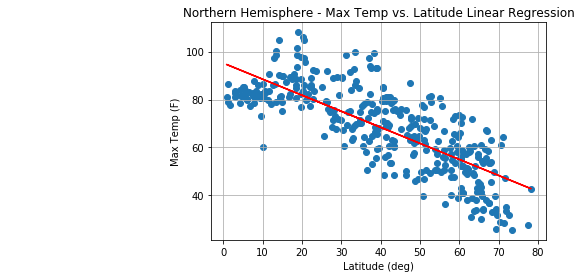

In [347]:
#create dataframe of only northern hemisphere data
northern_df = clean_city_data.loc[clean_city_data["Latitude"] > 0]

#plot norththern hemisphere scatterplot
plt.scatter(northern_df["Latitude"],northern_df["Max Temperature"])
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.grid(True)
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(northern_df["Latitude"],northern_df["Max Temperature"])
regress_values = northern_df["Latitude"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(northern_df["Latitude"],regress_values, c="r")
plt.annotate(EQ,(-55,90),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(-55,85),c="r",size=15)
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

In [343]:
stderr

0.029050348450566768

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

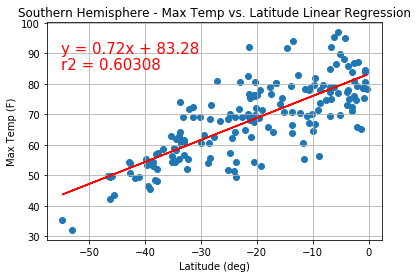

In [348]:
#create dataframe of onyly northern hemisphere data
southern_df = clean_city_data.loc[clean_city_data["Latitude"] < 0]

#plot southern hemisphere scatterplot
plt.scatter(southern_df["Latitude"],southern_df["Max Temperature"])
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.grid(True)
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(southern_df["Latitude"],southern_df["Max Temperature"])
regress_values = southern_df["Latitude"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(southern_df["Latitude"],regress_values, C="r")
plt.annotate(EQ,(-55,90),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(-55,85),c="r",size=15)
plt.savefig("SouthernHemisphereLR.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

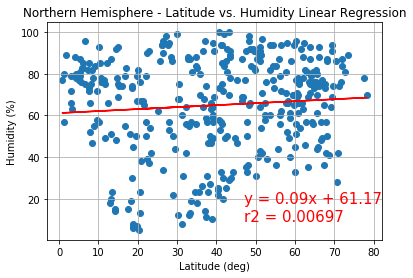

In [349]:
#plot norththern hemisphere scatterplot
plt.scatter(northern_df["Latitude"],northern_df["Humidity"])
plt.title(f"Northern Hemisphere - Latitude vs. Humidity Linear Regression")
plt.grid(True)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(northern_df["Latitude"],northern_df["Humidity"])
regress_values = northern_df["Latitude"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(northern_df["Latitude"],regress_values, c="r")
plt.annotate(EQ,(47,18),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(47,9),c="r",size=15)
plt.savefig("NorthernHemisphereLR.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

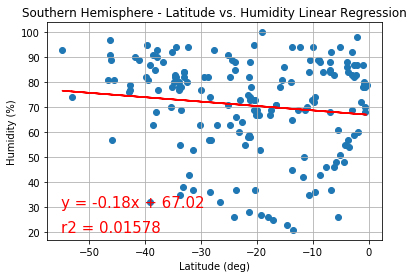

In [350]:
#plot southern hemisphere scatterplot
plt.scatter(southern_df["Latitude"],southern_df["Humidity"])
plt.title(f"Southern Hemisphere - Latitude vs. Humidity Linear Regression")
plt.grid(True)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(southern_df["Latitude"],southern_df["Humidity"])
regress_values = southern_df["Latitude"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(southern_df["Latitude"],regress_values, C="r")
plt.annotate(EQ,(-55,30),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(-55,20),c="r",size=15)
plt.savefig("SouthernHemisphereJJ.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

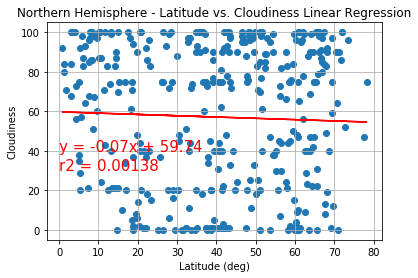

In [354]:
#plot norththern hemisphere scatterplot
plt.scatter(northern_df["Latitude"],northern_df["Clouds"])
plt.title(f"Northern Hemisphere - Latitude vs. Cloudiness Linear Regression")
plt.grid(True)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(northern_df["Latitude"],northern_df["Clouds"])
regress_values = northern_df["Latitude"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(northern_df["Latitude"],regress_values, c="r")
plt.annotate(EQ,(0,40),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(0,30),c="r",size=15)
plt.savefig("Northern Hemisphere - Latitude vs. Cloudiness Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

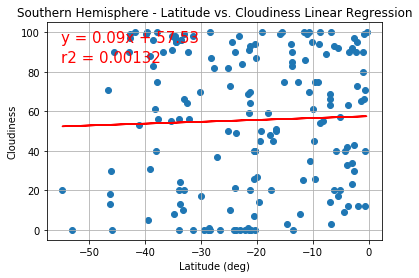

In [355]:
#plot southern hemisphere scatterplot
plt.scatter(southern_df["Latitude"],southern_df["Clouds"])
plt.title(f"Southern Hemisphere - Latitude vs. Cloudiness Linear Regression")
plt.grid(True)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(southern_df["Latitude"],southern_df["Clouds"])
regress_values = southern_df["Latitude"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(southern_df["Latitude"],regress_values, C="r")
plt.annotate(EQ,(-55,95),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(-55,85),c="r",size=15)
plt.savefig("Southern Hemisphere - Latitude vs. Cloudiness Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

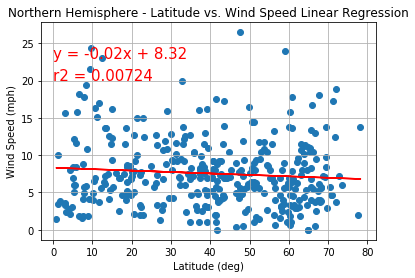

In [357]:
#plot norththern hemisphere scatterplot
plt.scatter(northern_df["Latitude"],northern_df["Wind"])
plt.title(f"Northern Hemisphere - Latitude vs. Wind Speed Linear Regression")
plt.grid(True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(northern_df["Latitude"],northern_df["Wind"])
regress_values = northern_df["Latitude"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(northern_df["Latitude"],regress_values, c="r")
plt.annotate(EQ,(0,23),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(0,20),c="r",size=15)
plt.savefig("Northern Hemisphere - Latitude vs. Wind Speed Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

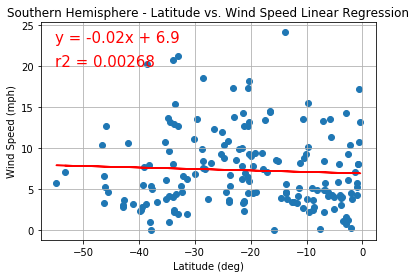

In [358]:
#plot southern hemisphere scatterplot
plt.scatter(southern_df["Latitude"],southern_df["Wind"])
plt.title(f"Southern Hemisphere - Latitude vs. Wind Speed Linear Regression")
plt.grid(True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(southern_df["Latitude"],southern_df["Wind"])
regress_values = southern_df["Latitude"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(southern_df["Latitude"],regress_values, C="r")
plt.annotate(EQ,(-55,23),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(-55,20),c="r",size=15)
plt.savefig("Southern Hemisphere - Latitude vs. Wind Speed Linear Regression.png")
plt.show()